## EDA LAB

The General Social Survey (GSS) is a bi-annual nationally representative survey of Americans, with almost 7000 different questions asked since the survey began in the 1970s. It has straightforward questions about respondents' demographic information, but also questions like "Does your job regularly require you to perform repetitive or forceful hand movements or involve awkward postures?" or "How often do the demands of your job interfere with your family life?" There are a variety of controversial questions. No matter what you're curious about, there's something interesting in here to check out. The codebook is 904 pages (use CTRL+F to search it).

The data and codebook are available at:
https://gss.norc.org/us/en/gss/get-the-data.html

The datasets are so large that it might make sense to pick the variables you want, and then download just those variables from:
https://gssdataexplorer.norc.org/variables/vfilter

Here is your task:
1. Download a small (5-15) set of variables of interest.
2. Write a short description of the data you chose, and why. (1 page)
3. Load the data using Pandas. Clean them up for EDA. Do this in a notebook with comments or markdown chunks explaining your choices.
4. Produce some numeric summaries and visualizations. (1-3 pages)
5. Describe your findings in 1-2 pages.
6. If you have other content that you think absolutely must be included, you can include it in an appendix of any length.

For example, you might want to look at how aspects of a person's childhood family are correlated or not with their career or family choices as an adult. Or how political or religious affiliations correlate with drug use or sexual practices. It's an extremely wide-ranging survey.

Feel free to work with other people in groups, and ask questions!

In [41]:
import pandas as pd
#
var_list = ['year','wrkstat', 'hrs1', 'prestige', 'marital', 'age', 'degree', 'sex', 'race', 'rincome' ] # List of variables you want to save
output_filename = 'selected_gss_data.csv' # Name of the file you want to save the data to
#
phase = 0 # Starts in write mode; after one iteration of loop, switches to append mode
#
for k in range(3): # for each chunk of the data
    url = 'https://github.com/DS3001/project_gss/raw/main/gss_chunk_' + str(1+k) + '.parquet' # Create url to the chunk to be processed
    print(url) # Check the url is correct
    df = pd.read_parquet(url) # Download this chunk of data
    print(df.head()) # Visually inspect the first few rows
    if phase == 0 :
        df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                                mode='w', # control write versus append
                                header=var_list, # variable names
                                index=False) # no row index saved
        phase = 1 # Switch from write mode to append mode
    elif phase == 1 :
        df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                                mode='a', # control write versus append
                                header=None, # variable names
                                index=False) # no row index saved
        phase = 1 # Switch from write mode to append mode

https://github.com/DS3001/project_gss/raw/main/gss_chunk_1.parquet
   year  id            wrkstat  hrs1  hrs2 evwork    occ  prestige  \
0  1972   1  working full time   NaN   NaN    NaN  205.0      50.0   
1  1972   2            retired   NaN   NaN    yes  441.0      45.0   
2  1972   3  working part time   NaN   NaN    NaN  270.0      44.0   
3  1972   4  working full time   NaN   NaN    NaN    1.0      57.0   
4  1972   5      keeping house   NaN   NaN    yes  385.0      40.0   

         wrkslf wrkgovt  ...  agehef12 agehef13 agehef14  hompoph wtssps_nea  \
0  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
1  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
2  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
3  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
4  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   

   wtssnrps_nea  wtssps_next wt

In [42]:
gss = pd.read_csv('selected_gss_data.csv')
gss = pd.DataFrame(gss)
gss.head()

,year,wrkstat,hrs1,prestige,marital,age,degree,sex,race,rincome
0,1972,working full time,NaN,50.0,never married,23.0,bachelor's,female,white,NaN
1,1972,retired,NaN,45.0,married,70.0,less than high school,male,white,NaN
2,1972,working part time,NaN,44.0,married,48.0,high school,female,white,NaN
3,1972,working full time,NaN,57.0,married,27.0,bachelor's,female,white,NaN
4,1972,keeping house,NaN,40.0,married,61.0,high school,female,white,NaN


2. I chose these variables because I figured they were ones where a lot of people would answer the question at hand. They weren't as invasive as some of the others like family history or political views. I think the variables I picked also say a pretty good amount about the person responding to it. Sex, age, and race are all useful descriptions for people in the work force. Those variables can go along with things like marital status and degree. Four hours worked on average, I really just wanted to see how the variable may have changed from 1972 to 2022. 

In [44]:
#remove a bunch of NA values from hrs1
gss = gss.dropna() 
#sort dataset by year
gss = gss.sort_values(by= 'year') 
#change column name for clarity
gss = gss.rename(columns={'hrs1': 'hrs/week'}) 
gss = gss.rename(columns={'rincome': 'income'})
#the next three lines got rid of the .0 behind the integers in the df
gss['age'] = gss['age'].apply(lambda x: int(x) if x.is_integer() else x) 
gss['prestige'] = gss['prestige'].apply(lambda x: int(x) if x.is_integer() else x)
gss['hrs/week'] = gss['hrs/week'].apply(lambda x: int(x) if x.is_integer() else x)
# Remove dollar signs and commas
gss['income'] = gss['income'].replace({'\$': '', ',': '', 'to': '-'}, regex=True)
#creating age margins
bins = [0, 18, 35, 50, 65, 100]
labels = ['0-18', '19-35', '36-50', '51-65', '66+']
gss['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

gss.head()


<>:13: SyntaxWarning: invalid escape sequence '\$'
<>:13: SyntaxWarning: invalid escape sequence '\$'
/var/folders/y7/ptqmbdxx7sd_k5_4ynr96zg00000gn/T/ipykernel_53976/4229485127.py:13: SyntaxWarning: invalid escape sequence '\$'
  gss['income'] = gss['income'].replace({'\$': '', ',': '', 'to': '-'}, regex=True)


,year,wrkstat,hrs/week,prestige,marital,age,degree,sex,race,income,age_group
3118,1974,working full time,65,69,married,41,bachelor's,male,white,15000 - 19999,51-65
3121,1974,working full time,40,41,never married,58,high school,female,white,7000 - 7999,36-50
3123,1974,working full time,55,60,married,48,graduate,male,white,20000 - 24999,19-35
3126,1974,working full time,15,24,married,54,less than high school,female,white,1000 - 2999,36-50
3131,1974,working full time,40,26,never married,22,high school,female,black,1000 - 2999,36-50


<Axes: xlabel='year', ylabel='income'>

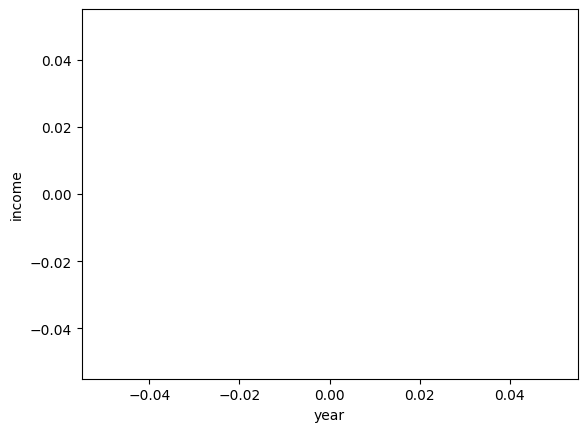

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

